# cab cancellation prediction

The cab bookings data are made available through a collaboration between Prof. Galit Shmueli at the Indian School of Business and YourCabs co-founder Mr. Rajath Kedilaya and IDRC managing partner, Mr. Amit Batra.

This competition is part of the MBA elective Business Analytics Using Data Mining, offered at the Indian School of Business.

YourCabs is a platform to efficiently connect urban consumers in need of local transport, with vendors in need of increased occupancy.

Industrial Data Research Corp. (IDRC) is a data sciences consultancy focused on Quantitative Modeling, Data Analytics, Scientific Computing, and Data Visualization/Infographics.

id - booking ID user_id - the ID of the customer (based on mobile number) vehicle_model_id - vehicle model type. package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms) travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental). from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages to_area_id - unique identifier of area. Applicable only for point-to-point travel from_city_id - unique identifier of city to_city_id - unique identifier of city (only for intercity) from_date - time stamp of requested trip start to_date - time stamp of trip end online_booking - if booking was done on desktop website mobile_site_booking - if booking was done on mobile website booking_created - time stamp of booking from_lat - latitude of from area from_long - longitude of from area to_lat - latitude of to area to_long - longitude of to area Car_Cancellation - whether the booking was cancelled (1) or not (0) due to unavailability of a car. Cost_of_error - the cost incurred if the booking is misclassified.

Target Variable--car cancellation

For No cancellation---0

For a cancelled booking, ---1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.options.display.max_colwidth = 170

In [2]:
data = pd.read_csv('Cab_cancellation.csv')

In [3]:
df=data.copy()

In [4]:
df.tail()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.03064,77.64910,12.952780,77.59088,0,1.0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.19956,77.70688,13.017436,77.64458,0,1.0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.07557,77.55904,NaN,NaN,0,1.0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.96897,77.59456,12.938230,77.62289,0,1.0
43430,185941,48730,12,NaN,2,689.0,393.0,15.0,NaN,11/25/2013 5:00,41603.25385,0,1,11/24/2013 14:50,12.97672,77.64927,13.199560,77.70688,0,1.0


In [5]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [6]:
df.shape

(43431, 20)

In [7]:
df.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
Cost_of_error              0
dtype: int64

In [8]:
(df.isnull().sum()/len(df))*100

id                      0.000000
user_id                 0.000000
vehicle_model_id        0.000000
package_id             82.616104
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_city_id           62.365591
to_city_id             96.343626
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
Cost_of_error           0.000000
dtype: float64

In [9]:
df1=df.drop(["id","package_id","from_city_id","to_city_id"],axis=1)

In [10]:
(df1.isnull().sum()/len(df1))*100

user_id                 0.000000
vehicle_model_id        0.000000
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
Cost_of_error           0.000000
dtype: float64

In [11]:
df1.shape

(43431, 16)

In [12]:
df1["to_area_id"]=df1["to_area_id"].fillna(df1["to_area_id"].mode()[0])

In [13]:
df1["to_lat"]=df1["to_lat"].fillna(df1["to_lat"].mean())
df1["to_long"]=df1["to_long"].fillna(df1["to_long"].mean())

In [14]:
(df1.isnull().sum()/len(df1))*100

user_id                 0.000000
vehicle_model_id        0.000000
travel_type_id          0.000000
from_area_id            0.202620
to_area_id              0.000000
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                  0.000000
to_long                 0.000000
Car_Cancellation        0.000000
Cost_of_error           0.000000
dtype: float64

In [15]:
df2=df1.copy()

In [16]:
df2=df2.dropna(axis=0,subset=["from_area_id","from_lat"])

In [17]:
(df2.isnull().sum()/len(df2))*100

user_id                 0.000000
vehicle_model_id        0.000000
travel_type_id          0.000000
from_area_id            0.000000
to_area_id              0.000000
from_date               0.000000
to_date                41.273247
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.000000
from_long               0.000000
to_lat                  0.000000
to_long                 0.000000
Car_Cancellation        0.000000
Cost_of_error           0.000000
dtype: float64

In [18]:
df2.shape

(43338, 16)

In [19]:
df2.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,22177,28,2,83.0,448.0,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,21413,12,2,1010.0,540.0,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,22178,12,2,1301.0,1034.0,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,13034,12,2,768.0,398.0,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,22180,12,2,1365.0,849.0,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [20]:
df3=df2.drop("to_date",axis=1)

In [21]:
df3.isnull().sum().sum()

0

In [22]:
df3.shape

(43338, 15)

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43338 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              43338 non-null  int64  
 1   vehicle_model_id     43338 non-null  int64  
 2   travel_type_id       43338 non-null  int64  
 3   from_area_id         43338 non-null  float64
 4   to_area_id           43338 non-null  float64
 5   from_date            43338 non-null  object 
 6   online_booking       43338 non-null  int64  
 7   mobile_site_booking  43338 non-null  int64  
 8   booking_created      43338 non-null  object 
 9   from_lat             43338 non-null  float64
 10  from_long            43338 non-null  float64
 11  to_lat               43338 non-null  float64
 12  to_long              43338 non-null  float64
 13  Car_Cancellation     43338 non-null  int64  
 14  Cost_of_error        43338 non-null  float64
dtypes: float64(7), int64(6), object(2)
m

In [24]:
# convert the required format datetime

In [25]:
df3["from_date"]=pd.to_datetime(df3["from_date"])
df3["booking_created"]=pd.to_datetime(df3["booking_created"])

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43338 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              43338 non-null  int64         
 1   vehicle_model_id     43338 non-null  int64         
 2   travel_type_id       43338 non-null  int64         
 3   from_area_id         43338 non-null  float64       
 4   to_area_id           43338 non-null  float64       
 5   from_date            43338 non-null  datetime64[ns]
 6   online_booking       43338 non-null  int64         
 7   mobile_site_booking  43338 non-null  int64         
 8   booking_created      43338 non-null  datetime64[ns]
 9   from_lat             43338 non-null  float64       
 10  from_long            43338 non-null  float64       
 11  to_lat               43338 non-null  float64       
 12  to_long              43338 non-null  float64       
 13  Car_Cancellation     43338 non-

In [27]:
#calculate the time lag  difference between booking time and journey start time

In [28]:
df3.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
1,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
2,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
3,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
4,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


In [29]:
df3["time_diff"]=df3["from_date"]-df3["booking_created"]

In [30]:
df3.head(1)

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,time_diff
0,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.92415,77.67229,12.92732,77.63575,0,1.0,0 days 00:21:00


In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43338 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   user_id              43338 non-null  int64          
 1   vehicle_model_id     43338 non-null  int64          
 2   travel_type_id       43338 non-null  int64          
 3   from_area_id         43338 non-null  float64        
 4   to_area_id           43338 non-null  float64        
 5   from_date            43338 non-null  datetime64[ns] 
 6   online_booking       43338 non-null  int64          
 7   mobile_site_booking  43338 non-null  int64          
 8   booking_created      43338 non-null  datetime64[ns] 
 9   from_lat             43338 non-null  float64        
 10  from_long            43338 non-null  float64        
 11  to_lat               43338 non-null  float64        
 12  to_long              43338 non-null  float64        
 13  Car_Cancellation

In [32]:
# extracting information from timedelta datatype--- column time_diff

In [33]:
# td=pd.to_timedelta(df3.time_diff).dt.components

In [34]:
# print(td)

       days  hours  minutes  seconds  milliseconds  microseconds  nanoseconds
0         0      0       21        0             0             0            0
1         0      6       35        0             0             0            0
2         0      0       22        0             0             0            0
3         0      1        6        0             0             0            0
4         0      1        7        0             0             0            0
...     ...    ...      ...      ...           ...           ...          ...
43426     0      3       35        0             0             0            0
43427     1     10       30        0             0             0            0
43428     0      3       55        0             0             0            0
43429     0      1       17        0             0             0            0
43430     0     14       10        0             0             0            0

[43338 rows x 7 columns]


In [35]:
td=df3["time_diff"].dt.components
td

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,0,21,0,0,0,0
1,0,6,35,0,0,0,0
2,0,0,22,0,0,0,0
3,0,1,6,0,0,0,0
4,0,1,7,0,0,0,0
...,...,...,...,...,...,...,...
43426,0,3,35,0,0,0,0
43427,1,10,30,0,0,0,0
43428,0,3,55,0,0,0,0
43429,0,1,17,0,0,0,0


In [36]:
df3["time_diff_day"]=td['days']+(td['hours']/24)+(td['minutes']/(24*60))

In [37]:
df3.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,time_diff,time_diff_day
0,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0,0 days 00:21:00,0.014583
1,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0,0 days 06:35:00,0.274306
2,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0,0 days 00:22:00,0.015278
3,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0,0 days 01:06:00,0.045833
4,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0,0 days 01:07:00,0.046528


In [38]:
df3=df3.drop(["time_diff"],axis=1)

In [39]:
df3.head(2)

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,time_diff_day
0,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.92415,77.67229,12.92732,77.63575,0,1.0,0.014583
1,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.96691,77.74935,12.92768,77.62664,0,1.0,0.274306


In [40]:
# calculate the distance from latitute and longitude

In [41]:
pip install geopy

     ------------------------------------ 119.8/119.8 kB 438.3 kB/s eta 0:00:00
     -------------------------------------- 40.3/40.3 kB 160.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
from geopy.distance import geodesic
from geopy.distance import distance

In [43]:
from geopy import Point

In [44]:
df10=df3.copy()

In [45]:
df10["point_1"]=df10.apply(lambda row: Point(latitude=row["from_lat"],longitude=row["from_long"]),axis=1)

In [46]:
df10.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,time_diff_day,point_1
0,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0,0.014583,"12 55m 26.94s N, 77 40m 20.244s E"
1,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0,0.274306,"12 58m 0.876s N, 77 44m 57.66s E"
2,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0,0.015278,"12 56m 13.9992s N, 77 37m 36.894s E"
3,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0,0.045833,"12 59m 23.964s N, 77 33m 11.952s E"
4,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0,0.046528,"12 50m 44.3508s N, 77 40m 40.53s E"


In [47]:
# add a new shifted point_next 

In [48]:
df10["point_next"]=df10["point_1"].shift(1)

In [49]:
df10.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,time_diff_day,point_1,point_next
0,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0,0.014583,"12 55m 26.94s N, 77 40m 20.244s E",NaN
1,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0,0.274306,"12 58m 0.876s N, 77 44m 57.66s E","12 55m 26.94s N, 77 40m 20.244s E"
2,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0,0.015278,"12 56m 13.9992s N, 77 37m 36.894s E","12 58m 0.876s N, 77 44m 57.66s E"
3,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0,0.045833,"12 59m 23.964s N, 77 33m 11.952s E","12 56m 13.9992s N, 77 37m 36.894s E"
4,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0,0.046528,"12 50m 44.3508s N, 77 40m 40.53s E","12 59m 23.964s N, 77 33m 11.952s E"


In [50]:
df10["point_2"]=df10.apply(lambda row: Point(latitude=row["to_lat"],longitude=row["to_long"]),axis=1)

In [51]:
df10.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,time_diff_day,point_1,point_next,point_2
0,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0,0.014583,"12 55m 26.94s N, 77 40m 20.244s E",NaN,"12 55m 38.352s N, 77 38m 8.7s E"
1,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0,0.274306,"12 58m 0.876s N, 77 44m 57.66s E","12 55m 26.94s N, 77 40m 20.244s E","12 55m 39.648s N, 77 37m 35.904s E"
2,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0,0.015278,"12 56m 13.9992s N, 77 37m 36.894s E","12 58m 0.876s N, 77 44m 57.66s E","13 2m 52.5336s N, 77 35m 51.9576s E"
3,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0,0.045833,"12 59m 23.964s N, 77 33m 11.952s E","12 56m 13.9992s N, 77 37m 36.894s E","12 58m 17.148s N, 77 38m 20.904s E"
4,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0,0.046528,"12 50m 44.3508s N, 77 40m 40.53s E","12 59m 23.964s N, 77 33m 11.952s E","12 57m 15.624s N, 77 36m 2.592s E"


In [52]:
# calculation of distance

In [53]:
df10["Distance"]=df10.apply(lambda  row:distance(row["point_1"], row["point_2"]).km,axis=1)

In [55]:
df10.head(2)

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,time_diff_day,point_1,point_next,point_2,Distance
0,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.92415,77.67229,12.92732,77.63575,0,1.0,0.014583,"12 55m 26.94s N, 77 40m 20.244s E",NaN,"12 55m 38.352s N, 77 38m 8.7s E",3.980687
1,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.96691,77.74935,12.92768,77.62664,0,1.0,0.274306,"12 58m 0.876s N, 77 44m 57.66s E","12 55m 26.94s N, 77 40m 20.244s E","12 55m 39.648s N, 77 37m 35.904s E",14.004432


In [56]:
df11=df10.copy()

In [57]:
df11=df11.drop(["from_date","from_lat","from_long","to_lat","to_long","point_1","point_next","point_2"],axis=1)

In [58]:
df11.head(2)

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Cost_of_error,time_diff_day,Distance
0,22177,28,2,83.0,448.0,0,0,2013-01-01 01:39:00,0,1.0,0.014583,3.980687
1,21413,12,2,1010.0,540.0,0,0,2013-01-01 02:25:00,0,1.0,0.274306,14.004432


# ANALYSING ONLINE_BOOKING

visualization using matplotlib seaborn,crosstab

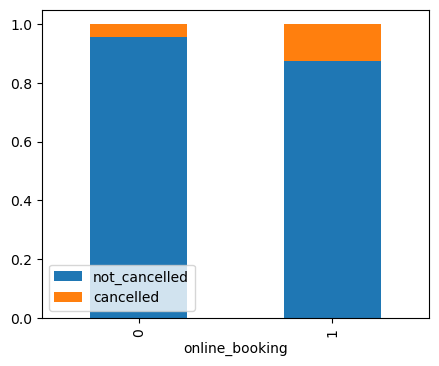

                not_cancelled  cancelled
online_booking                          
0                    0.956315   0.043685
1                    0.874975   0.125025


In [59]:
ax=pd.crosstab(df11.online_booking,df11.Car_Cancellation,normalize='index')
ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)

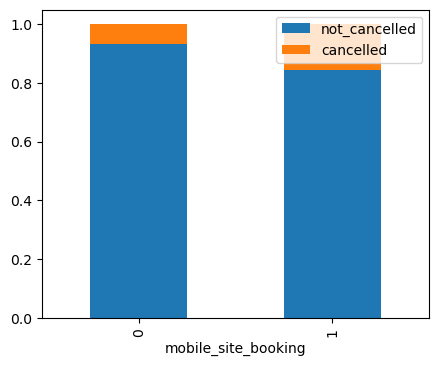

                     not_cancelled  cancelled
mobile_site_booking                          
0                         0.931479   0.068521
1                         0.845949   0.154051


In [60]:
ax=pd.crosstab(df11.mobile_site_booking,df11.Car_Cancellation,normalize='index')
ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)

# We observe that mobile_site_booking have double possibility to become canceled

# ANALYSING VEHICLE_MODEL_ID

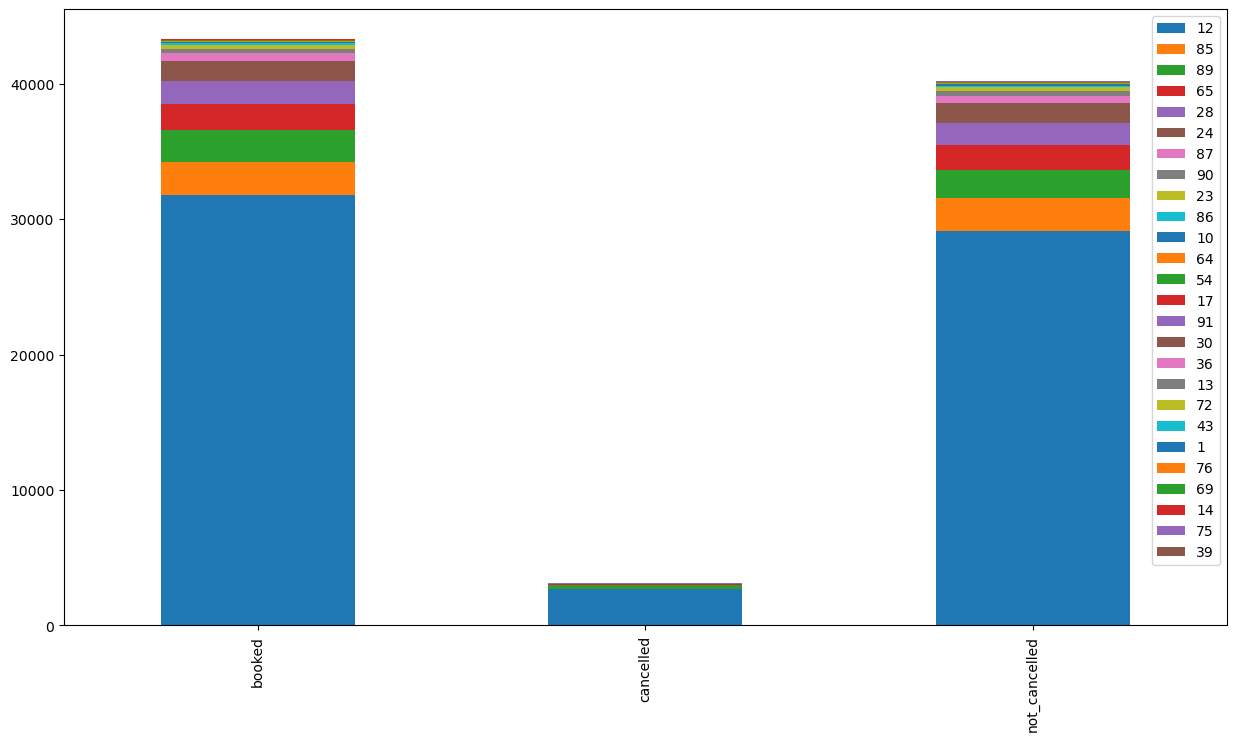

In [61]:
#Analysing vehicle_model_id
all_bookings=df11['vehicle_model_id'].value_counts()
cancelled=df11[df11['Car_Cancellation']==1]['vehicle_model_id'].value_counts()
not_cancelled=df11[df11['Car_Cancellation']==0]['vehicle_model_id'].value_counts()
qf=pd.DataFrame([all_bookings,cancelled,not_cancelled])

#qf.fillna(0,inplace=True)
qf.index=['booked','cancelled','not_cancelled']
qf.plot(kind='bar',stacked=True,figsize=(15,8))
plt.show()

# ANALYSING travel_type_id

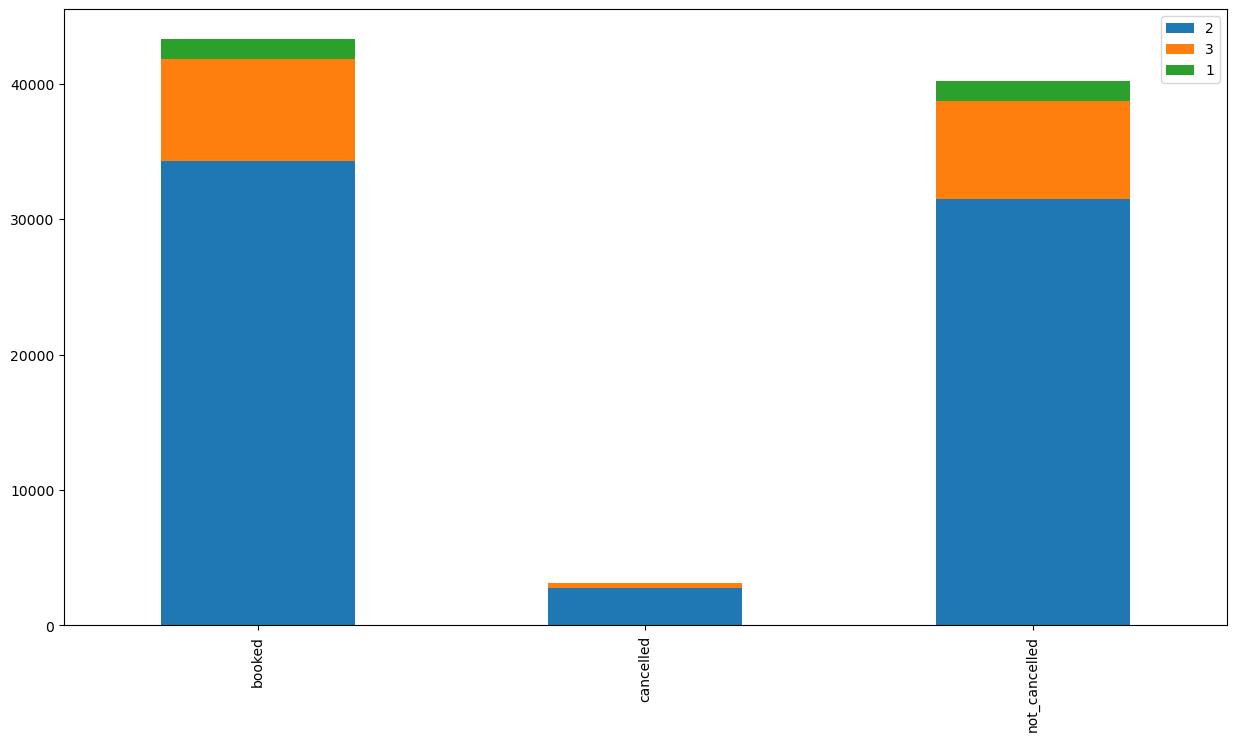

In [62]:
#Analysing travel_type_id
all_bookings=df11['travel_type_id'].value_counts()
cancelled=df11[df11['Car_Cancellation']==1]['travel_type_id'].value_counts()
not_cancelled=df11[df11['Car_Cancellation']==0]['travel_type_id'].value_counts()
qf=pd.DataFrame([all_bookings,cancelled,not_cancelled])

#qf.fillna(0,inplace=True)
qf.index=['booked','cancelled','not_cancelled']
qf.plot(kind='bar',stacked=True,figsize=(15,8))
plt.show()

#  FIND HOLIDAYS IN DATASET AND SET THEM AS AN INDEPENDENT VARIABLE

In [63]:
df12=df11.copy()

In [64]:
dates=[]
date =[]
for i in df12['booking_created']:
    date = [i.month,i.day]
    dates.append(date)

holidays=[[1,26],[8,15],[10,2],[4,22],[1,14],[4,24],[3,29],[5,22],[9,9],[10,14],[10,13],[11,24],[11,17],[12,25],[1,1]]
#_,_,_,maharashi,id,_,holi,maharana pratap,janmastami,dp,dp,chatt,deepawali,_,_
on_holidays=[]
for i in dates:
    if i in holidays:
        on_holidays.append(1)
    else:
        on_holidays.append(0)
on_holidays = pd.DataFrame({'On_holidays':on_holidays})
df12.insert(8, 'On_holidays', on_holidays)
df12.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,booking_created,On_holidays,Car_Cancellation,Cost_of_error,time_diff_day,Distance
0,22177,28,2,83.0,448.0,0,0,2013-01-01 01:39:00,1.0,0,1.0,0.014583,3.980687
1,21413,12,2,1010.0,540.0,0,0,2013-01-01 02:25:00,1.0,0,1.0,0.274306,14.004432
2,22178,12,2,1301.0,1034.0,0,0,2013-01-01 03:08:00,1.0,0,1.0,0.015278,12.648909
3,13034,12,2,768.0,398.0,0,0,2013-01-01 04:39:00,1.0,0,1.0,0.045833,9.534596
4,22180,12,2,1365.0,849.0,0,0,2013-01-01 07:53:00,1.0,0,1.0,0.046528,14.655467


In [65]:
on_holidays.head()

,On_holidays
0,1
1,1
2,1
3,1
4,1


ANALYSING ON_HOLIDAYS VARIABLE

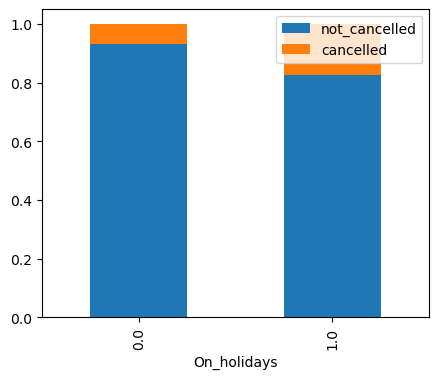

             not_cancelled  cancelled
On_holidays                          
0.0               0.931607   0.068393
1.0               0.827451   0.172549


In [66]:
ax=pd.crosstab(df12.On_holidays,df12.Car_Cancellation,normalize='index')
ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)

In [67]:
#big posibility to canceled on holidays

Double posibility to canceled a reservation on holidays

In [69]:
holiday_cancellation=df12.groupby(['On_holidays','Car_Cancellation']).size()
holiday_cancellation

On_holidays  Car_Cancellation
0.0          0                   38862
             1                    2853
1.0          0                    1266
             1                     264
dtype: int64

# extracting month , date,hour from booking_created column

In [70]:
import datetime as dt

In [71]:
df11["Month"]=df11["booking_created"].dt.month
df11["date"]=df11["booking_created"].dt.day
df11["hour"]=df11["booking_created"].dt.hour

In [72]:
df11.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Cost_of_error,time_diff_day,Distance,Month,date,hour
0,22177,28,2,83.0,448.0,0,0,2013-01-01 01:39:00,0,1.0,0.014583,3.980687,1,1,1
1,21413,12,2,1010.0,540.0,0,0,2013-01-01 02:25:00,0,1.0,0.274306,14.004432,1,1,2
2,22178,12,2,1301.0,1034.0,0,0,2013-01-01 03:08:00,0,1.0,0.015278,12.648909,1,1,3
3,13034,12,2,768.0,398.0,0,0,2013-01-01 04:39:00,0,1.0,0.045833,9.534596,1,1,4
4,22180,12,2,1365.0,849.0,0,0,2013-01-01 07:53:00,0,1.0,0.046528,14.655467,1,1,7


In [73]:
df11.isnull().sum()

user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
to_area_id             0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
Cost_of_error          0
time_diff_day          0
Distance               0
Month                  0
date                   0
hour                   0
dtype: int64

In [74]:
# create a function for the national holiday and festivals from booking_created coulmn

In [75]:
df_final=df11.copy()

In [76]:
df_final=df_final.drop(["booking_created"],axis=1)

In [77]:
X=df_final.drop(["Car_Cancellation","Cost_of_error"],axis=1)

In [78]:
Y=df_final["Car_Cancellation"]

In [79]:
# multi collinearity of X

In [80]:
corr_matrix=X.corr(method="spearman").abs()

<AxesSubplot:>

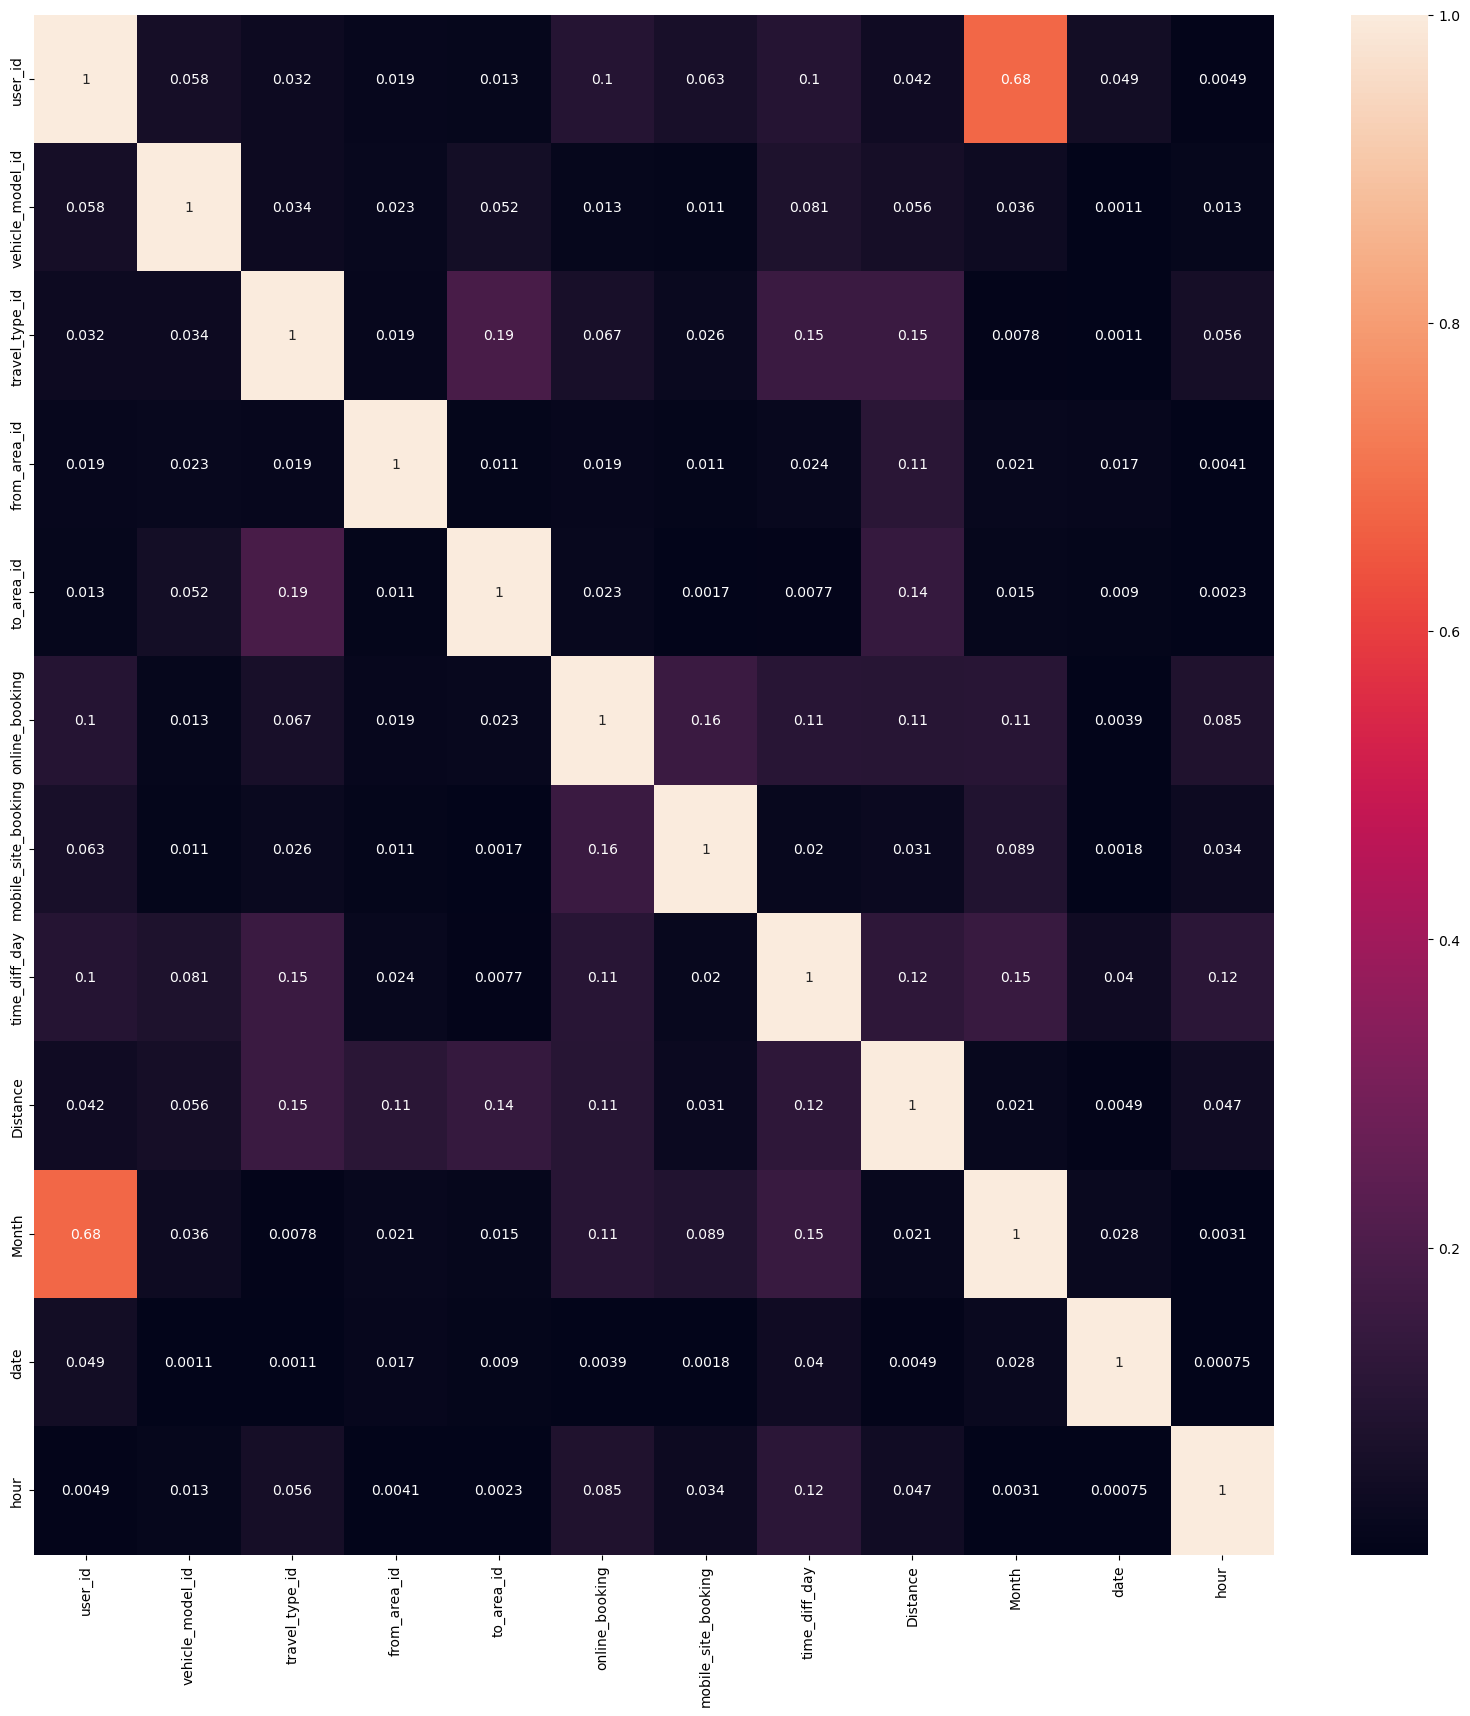

In [81]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)

In [82]:
# scaling of X

In [83]:
# JUST GIVE THE VARIABLE NAME AS X2_final

In [84]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)
X2_final = pd.DataFrame(X_scaled,columns=X.columns)
X2_final.head()

,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,time_diff_day,Distance,Month,date,hour
0,0.454921,0.300000,0.5,0.057816,0.318344,0.0,0.0,0.012048,0.066859,0.0,0.0,0.043478
1,0.439237,0.122222,0.5,0.719486,0.384011,0.0,0.0,0.015278,0.235216,0.0,0.0,0.086957
2,0.454941,0.122222,0.5,0.927195,0.736617,0.0,0.0,0.012057,0.212449,0.0,0.0,0.130435
3,0.267233,0.122222,0.5,0.546752,0.282655,0.0,0.0,0.012437,0.160142,0.0,0.0,0.173913
4,0.454982,0.122222,0.5,0.972877,0.604568,0.0,0.0,0.012445,0.246151,0.0,0.0,0.304348


# Model building

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,Y_train,Y_test=train_test_split(X2_final,Y,test_size=0.2,stratify=Y,random_state=100)

In [87]:
#import algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC

In [88]:
rf=RandomForestClassifier()
bg=BaggingClassifier()
svc=SVC()
dt=DecisionTreeClassifier()

In [89]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict

In [90]:
from sklearn.model_selection import cross_validate

#for model in[rf,bg,dt,svc]: print("======="5) print("Performance of",model) print("======="5) cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=50) scoring=["roc_auc","f1_macro","precision_macro","recall_macro"] cross_val_scores=cross_validate(model,X2_final,Y,scoring=scoring,cv=cv) roc_auc_test_cv=round(cross_val_scores["test_roc_auc"].mean(),4) f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4) precisio_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4) Recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)

#print of metrics
print("ROC AUC",roc_auc_test_cv) 

print("F1 MACRO",f1_test_cv) 

print("PRECISION MACRO",precisio_test_cv) 

print("RECALL MACRO",Recall_test_cv) 

In [92]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for model in[rf,bg,dt]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR) 
    print("======="*3)
    print("ROC_AUC \n",ROC) 
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS) 
    #print("PRECISION MACRO",precisio_test_cv) 
    #print("RECALL MACRO",Recall_test_cv) 

Performance of RandomForestClassifier()
confusion matrix 
 [[7983   59]
 [ 456  170]]
Accuracy 
 0.9405860636825104
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8042
           1       0.74      0.27      0.40       626

    accuracy                           0.94      8668
   macro avg       0.84      0.63      0.68      8668
weighted avg       0.93      0.94      0.93      8668

ROC_AUC 
 0.6321145058729211
MACRO Precision_recall_F1 
 (0.8441616201758212, 0.6321145058729212, 0.6832063574181291, None)
Performance of BaggingClassifier()
confusion matrix 
 [[7935  107]
 [ 450  176]]
Accuracy 
 0.9357406552838025
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8042
           1       0.62      0.28      0.39       626

    accuracy                           0.94      8668
   macro avg       0.78      0.63      0.68      8668
we

In [94]:
# Balancing the data

In [95]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss, ClusterCentroids

In [96]:
smote = SMOTE()
adasyn=ADASYN()
over=RandomOverSampler()
border=BorderlineSMOTE()
under=RandomUnderSampler()

In [97]:
for model in[rf]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    for balancer in[border,under]:
        X_train_1,Y_train_1=balancer.fit_resample(X_train,Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        print("ROC_AUC \n",ROC) 
        print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS) 
    #print("PRECISION MACRO",precisio_test_cv) 
    #print("RECALL MACRO",Recall_test_cv) 

Performance of RandomForestClassifier()
confusion matrix 
 [[7740  302]
 [ 343  283]]
Accuracy 
 0.9255883710198431
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8042
           1       0.48      0.45      0.47       626

    accuracy                           0.93      8668
   macro avg       0.72      0.71      0.71      8668
weighted avg       0.92      0.93      0.92      8668

ROC_AUC 
 0.7072619148829666
MACRO Precision_recall_F1 
 (0.720662972091897, 0.7072619148829666, 0.7136911643270025, None)
confusion matrix 
 [[6516 1526]
 [ 140  486]]
Accuracy 
 0.8077988001845869
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8042
           1       0.24      0.78      0.37       626

    accuracy                           0.81      8668
   macro avg       0.61      0.79      0.63      8668
weighted avg       0.93      0.81     

In [101]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'xgboost'

In [104]:
!pip install xgboost --no-cache-dir

     --------------------------------------- 70.9/70.9 MB 51.8 kB/s eta 0:00:00
^C


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [109]:
!pip install catboost --no-cache-dir

     --------------------------------------- 70.9/70.9 MB 40.3 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sethu\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



^C


In [111]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [113]:
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xb=XGBClassifier()

     --------------------------------------- 70.9/70.9 MB 38.2 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sethu\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sethu\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



     --------------------------------------- 70.9/70.9 MB 49.5 kB/s eta 0:00:00


In [115]:
for model in[ad,gb,xb]:
    print("======="*8)
    print("AFTER data-Balancing Performance:-",model)
    print("======="*8)
    for balancer in[border,under]:
        X_train_1, Y_train_1 = balancer.fit_resample(X_train, Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        print(model,"using technique:- ",balancer)
        #print("======="*6) 
        print("======="*8) 
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        print("ROC_AUC \n",ROC) 
        print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
        print("======="*8)
        print("Conclude one balaning method")
        print("======="*8)
        
        print("======="*8)

AFTER data-Balancing Performance:- AdaBoostClassifier()
AdaBoostClassifier() using technique:-  BorderlineSMOTE()
confusion matrix 
 [[6797 1245]
 [ 195  431]]
Accuracy 
 0.8338717120443009
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.85      0.90      8042
           1       0.26      0.69      0.37       626

    accuracy                           0.83      8668
   macro avg       0.61      0.77      0.64      8668
weighted avg       0.92      0.83      0.87      8668

ROC_AUC 
 0.766843083396831
MACRO Precision_recall_F1 
 (0.6146354442581498, 0.7668430833968312, 0.6393370509035586, None)
Conclude one balaning method
AdaBoostClassifier() using technique:-  RandomUnderSampler()
confusion matrix 
 [[6302 1740]
 [ 139  487]]
Accuracy 
 0.7832256575911398
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      8042
           1       0.22      0.78    

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sethu\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) using technique:-  BorderlineSMOTE()
confusion matrix 
 [[7855  187]
 [ 370  256]]
Accuracy 
 0.9357406552838025
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8042
  

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sethu\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\sethu\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\sethu\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\sethu\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\sethu\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\sethu\anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\sethu\anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

During handling of the above exception, an

     ------------------------------         80.2/101.0 MB 61.4 kB/s eta 0:05:39
     --------------------------------       86.0/101.0 MB 41.0 kB/s eta 0:06:06
     -------------------------              66.8/101.0 MB 45.4 kB/s eta 0:12:33


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sethu\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\sethu\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\sethu\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\sethu\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\sethu\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\sethu\anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\sethu\anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

During handling of the above exception, an